In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ml_utils.save_io as io
import numpy as np
import os
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
def get_df(models, model_names=None):
    """
    Takes a list of model directories and extracts the training information from them.
    
    models: list of directory paths
        each directory must contain a csv named "model_data.csv"
    model_names: list of str or None
        the corresponding names of the models if different than the end point folder name
    """
    df = pd.DataFrame()
    if model_names is None:
        model_names = [m.split("/")[-1] for m in models]
    for model_path,model_name in zip(models,model_names):
        df_path = os.path.join(model_path,"model_data.csv")
        if not os.path.exists(df_path): 
            print("Could not find", df_path)
            continue
        new_df = pd.read_csv(df_path,sep="!")
        new_df['Model Name'] = model_name
        df = df.append(new_df,sort=True)
    return df

In [3]:
main_path = os.path.expanduser("~/src/locgame/training_scripts/2d_games")

In [4]:
exp_folder = "objrecogPVP/"
model_folders = io.get_model_folders(os.path.join(main_path,exp_folder),True)
model_folders

['/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_0_seed131300_egoCentered0_absoluteCoords0_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_1_model_classPooledRNNLocator_seed131300_egoCentered0_absoluteCoords0_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_2_model_classPooledRNNLocator_seed131300_egoCentered0_absoluteCoords0_post_obj_preds1',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_3_seed131300_egoCentered0_absoluteCoords0_post_obj_preds1',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_4_model_classPooledRNNLocator_seed131300_egoCentered0_absoluteCoords1_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_5_seed131300_egoCentered0_absoluteCoords1_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_6_s

In [5]:
models = []
idxs = list(range(len(model_folders)))
# idxs = [0,2]
for idx in idxs:
    models.append(model_folders[idx])
models

['/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_0_seed131300_egoCentered0_absoluteCoords0_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_1_model_classPooledRNNLocator_seed131300_egoCentered0_absoluteCoords0_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_2_model_classPooledRNNLocator_seed131300_egoCentered0_absoluteCoords0_post_obj_preds1',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_3_seed131300_egoCentered0_absoluteCoords0_post_obj_preds1',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_4_model_classPooledRNNLocator_seed131300_egoCentered0_absoluteCoords1_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_5_seed131300_egoCentered0_absoluteCoords1_post_obj_preds0',
 '/home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_6_s

In [6]:
# exp_folder = "pooledmodel/"
# model_folders = io.get_model_folders(os.path.join(main_path,exp_folder),True)
# model_folders

In [7]:
# idxs = list(range(len(model_folders)))
# # idxs = [0,1,4]
# for idx in idxs:
#     models.append(model_folders[idx])
# models

In [8]:
# model_names = ["AlloRel1", "AlloAbs1", "EgoRel1", "EgoAbs1",
#                 "AlloRel2", "AlloAbs2", "EgoRel2"]
# model_names = ["EgoRel1", "AlloAbs1", "EgoRel2", "AlloAbs2", "EgoRel3", "AlloAbs3"]
model_names = None

In [9]:
df = get_df(models,model_names)
# df['seed'] = df.apply(lambda x: getattr(x,"Model Name").split("seed")[-1].split("_")[0], axis=1)
# df['post_obj_preds'] = df.apply(lambda x: getattr(x,"Model Name").split("post_obj_preds")[-1].split("_")[0], axis=1)
df = df.sort_values(by="model_type")
df

Could not find /home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_53_model_classConcatRNNLocator_seed131300_egoCentered1_absoluteCoords1_post_obj_preds1/model_data.csv
Could not find /home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_57_model_classPooledRNNLocator_seed131320_egoCentered0_absoluteCoords1_post_obj_preds1/model_data.csv
Could not find /home/grantsrb/src/locgame/training_scripts/2d_games/objrecogPVP/objrecogPVP_58_model_classPooledRNNLocator_seed131320_egoCentered1_absoluteCoords0_post_obj_preds0/model_data.csv


,Model Name,absoluteCoords,act_fxn,alpha,attn_size,batch_size,class_bnorm,class_drop_p,class_h_size,cnn_type,dec_drop_p,dec_layers,dec_slen,description,drop_p,egoCentered,emb_size,enc_drop_p,enc_layers,enc_mask,enc_slen,env_name,epoch,exp_name,exp_num,game_keys,gen_decs,ignore_keys,img_shape,init_decs,l2,lr,main_path,maxObjCount,maxObjLoc,minObjCount,minObjLoc,model_class,model_type,multi_gpu,multi_init,n_epochs,n_filts,n_heads,n_loss_loops,n_rollouts,n_runners,n_runs,n_tsteps,obj_recog,post_obj_preds,post_rew_preds,prep_fxn,randomizeObjs,restrictCamera,resume_folder,rew_alpha,rew_recog,save_folder,save_root,seed,smoothMovement,specGoalObjs,state_size,step_loops,targ_shape,train_color_acc,train_color_loss,train_loc_loss,train_loss,train_obj_acc,train_obj_loss,train_rew,train_rew_loss,train_shape_acc,train_shape_loss,use_bptt,val_color_acc,val_color_loss,val_loc_loss,val_loss,val_obj_acc,val_obj_loss,val_rew,val_rew_loss,val_shape_acc,val_shape_loss,validation,worker_id
15,objrecogPVP_56_model_classPooledRNNLocator_see...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,15,objrecogPVP,56,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,PooledRNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,0,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_56_model_cl...,./2d_games,131320,0,0,1,1,torch.Size([4]),0.569727,0.913935,0.468697,0.812581,0.436652,1.297075,tensor(-0.0725),0.0,0.303578,1.680215,True,0.557823,1.131797,0.521228,1.031816,0.306122,1.698772,-0.076621,0.0,0.054422,2.265748,0,NaN
122,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,122,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,1,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_14_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.924302,0.213653,0.169162,0.262435,0.852221,0.406456,tensor(-0.0265),0.0,0.780140,0.599259,True,0.929577,0.222762,0.140542,0.905745,0.485915,1.713110,-0.019990,0.0,0.042254,3.203458,0,NaN
123,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,123,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,1,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_14_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.919020,0.220272,0.157714,0.259146,0.850028,0.407893,tensor(-0.0259),0.0,0.781037,0.595513,True,0.904762,0.245262,0.193835,0.940705,0.465986,1.745725,-0.028494,0.0,0.027211,3.246188,0,NaN
124,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,124,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,1,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_14_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.919

In [19]:
idx = (df['model_class']=="RNNLocator")
# idx = idx&((df['model_type']=="EgoRelative")|(df['model_type']=="AlloAbsolute"))
# idx = idx&(df['post_obj_preds']==1)
filtered_df = df.loc[idx]
# filtered_df = df
print(set(filtered_df["model_class"]))

{'RNNLocator'}


In [20]:
filtered_df['Model Type'] = filtered_df['model_type']
new_names = ["Allocentric, Agent-Coords", "Allocentric, World-Coords",
             "Egocentric, Agent-Coords", "Egocentric, World-Coords"]
old_names = ["AlloRelative", "AlloAbsolute","EgoRelative","EgoAbsolute"]

for new_name,old_name in zip(new_names,old_names):
    filtered_df.loc[filtered_df['Model Type']==old_name,'Model Type'] = new_name
filtered_df['Object Predictions'] = filtered_df.apply(lambda x: "Post Motion" if x.post_obj_preds else "Pre Motion", axis=1)
filtered_df

/home/grantsrb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/grantsrb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Model Name,absoluteCoords,act_fxn,alpha,attn_size,batch_size,class_bnorm,class_drop_p,class_h_size,cnn_type,dec_drop_p,dec_layers,dec_slen,description,drop_p,egoCentered,emb_size,enc_drop_p,enc_layers,enc_mask,enc_slen,env_name,epoch,exp_name,exp_num,game_keys,gen_decs,ignore_keys,img_shape,init_decs,l2,lr,main_path,maxObjCount,maxObjLoc,minObjCount,minObjLoc,model_class,model_type,multi_gpu,multi_init,n_epochs,n_filts,n_heads,n_loss_loops,n_rollouts,n_runners,n_runs,n_tsteps,obj_recog,post_obj_preds,post_rew_preds,prep_fxn,randomizeObjs,restrictCamera,resume_folder,rew_alpha,rew_recog,save_folder,save_root,seed,smoothMovement,specGoalObjs,state_size,step_loops,targ_shape,train_color_acc,train_color_loss,train_loc_loss,train_loss,train_obj_acc,train_obj_loss,train_rew,train_rew_loss,train_shape_acc,train_shape_loss,use_bptt,val_color_acc,val_color_loss,val_loc_loss,val_loss,val_obj_acc,val_obj_loss,val_rew,val_rew_loss,val_shape_acc,val_shape_loss,validation,worker_id,Model Type,Object Predictions
122,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,122,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,1,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_14_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.924302,0.213653,0.169162,0.262435,0.852221,0.406456,tensor(-0.0265),0.0,0.780140,0.599259,True,0.929577,0.222762,0.140542,0.905745,0.485915,1.713110,-0.019990,0.0,0.042254,3.203458,0,NaN,"Allocentric, World-Coords",Post Motion
123,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,123,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,1,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_14_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.919020,0.220272,0.157714,0.259146,0.850028,0.407893,tensor(-0.0259),0.0,0.781037,0.595513,True,0.904762,0.245262,0.193835,0.940705,0.465986,1.745725,-0.028494,0.0,0.027211,3.246188,0,NaN,"Allocentric, World-Coords",Post Motion
124,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,124,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,1,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_14_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.919071,0.234923,0.158601,0.269782,0.849220,0.428544,tensor(-0.0261),0.0,0.779370,0.622164,True,0.952055,0.146541,0.142512,0.950902,0.493151,1.802045,-0.020814,0.0,0.034247,3.457550,0,NaN,"Allocentric, World-Coords",Post Motion
125,objrecogPVP_14_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,125,objrecogPVP,14,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,

In [23]:
hue = "Model Type"
style = None

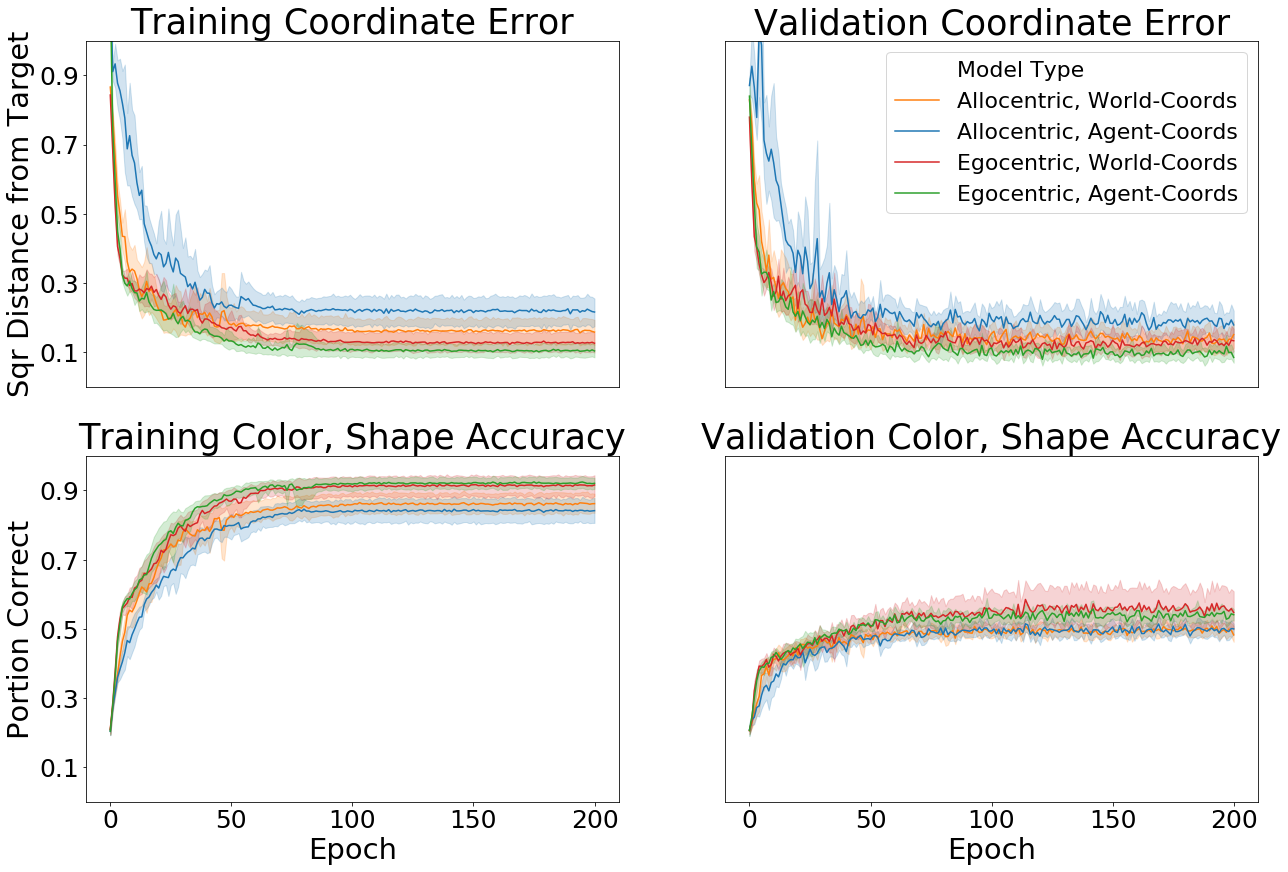

In [24]:
cs = sns.color_palette()
colors = {new_names[i]:cs[i] for i in range(len(new_names))}
dashes = {"Pre Motion": (1,0), "Post Motion":(3,3)}

fig = plt.figure(figsize=(21,14))
ticksize = 25
titlesize = 35
labelsize = 29
legendsize = 22

## Train Loc
plt.subplot(2,2,1)
sns.lineplot(x="epoch",
             y='train_loc_loss',
             hue=hue,
             style=style,
             data=filtered_df,
             palette=colors,
            dashes=dashes)
plt.title("Training Coordinate Error",fontsize=titlesize)
plt.ylabel("Sqr Distance from Target",fontsize=labelsize)
plt.xlabel("", fontsize=labelsize)
ylim = [0,1]
xticks = [0,50,100,150,200]
yticks = [.1,.3,.5,.7,.9]
plt.ylim(ylim)
plt.xticks([], fontsize=ticksize)
plt.yticks(yticks, fontsize=ticksize)
ax = plt.gca()
ax.get_legend().remove()

## Val Loc
plt.subplot(2,2,2)
sns.lineplot(x="epoch",
             y='val_loc_loss',
             hue=hue,
             style=style,
             data=filtered_df,
             dashes=dashes,
             palette=colors)
plt.title("Validation Coordinate Error",fontsize=titlesize)
plt.ylabel("",fontsize=labelsize)
plt.xlabel("", fontsize=labelsize)
plt.ylim(ylim)
plt.xticks([], fontsize=ticksize)
plt.yticks([], fontsize=ticksize)
plt.legend(fontsize=legendsize)

## Train Object
plt.subplot(2,2,3)
sns.lineplot(x="epoch",
             y='train_obj_acc',
             hue=hue,
             style=style,
             data=filtered_df,
             dashes=dashes,
             palette=colors)
plt.title("Training Color, Shape Accuracy",fontsize=titlesize)
plt.ylabel("Portion Correct",fontsize=labelsize)
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylim(ylim)
plt.xticks(xticks,fontsize=ticksize)
plt.yticks(yticks,fontsize=ticksize)
ax = plt.gca()
ax.get_legend().remove()


## Val Object
plt.subplot(2,2,4)
sns.lineplot(x="epoch",
             y='val_obj_acc',
             hue=hue,
             style=style,
             data=filtered_df,
             dashes=dashes,
             palette=colors)
plt.title("Validation Color, Shape Accuracy",fontsize=titlesize)
plt.ylabel("",fontsize=labelsize)
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylim(ylim)
plt.xticks(xticks,fontsize=ticksize)
plt.yticks([],fontsize=ticksize)
ax = plt.gca()
ax.get_legend().remove()


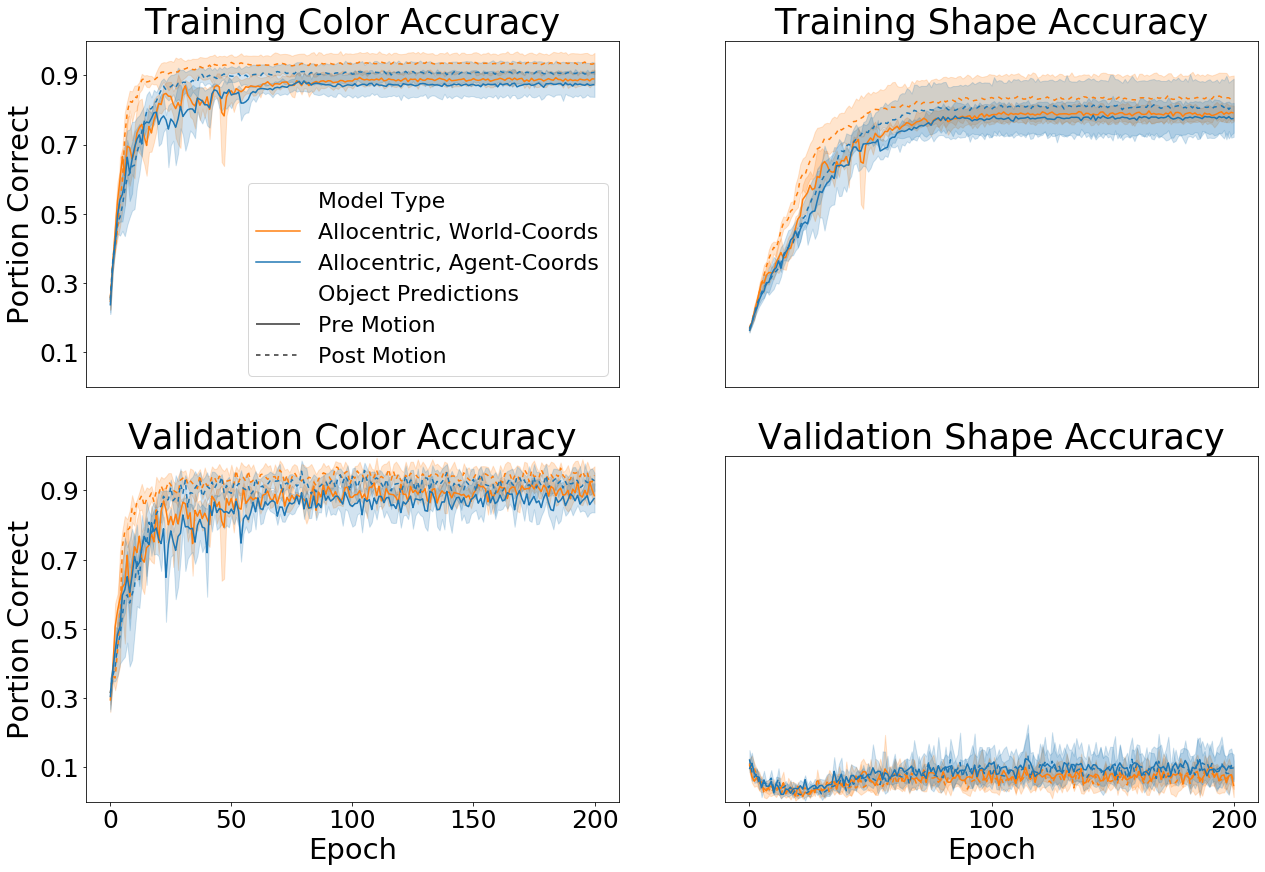

In [93]:
cs = sns.color_palette()
colors = {new_names[i]:cs[i] for i in range(len(new_names))}
dashes = {"Pre Motion": (1,0), "Post Motion":(3,3)}

fig = plt.figure(figsize=(21,14))
ticksize = 25
titlesize = 35
labelsize = 29
legendsize = 22

## Train Color
plt.subplot(2,2,1)
sns.lineplot(x="epoch",
             y='train_color_acc',
             hue=hue,
             style=style,
             data=filtered_df,
             palette=colors,
            dashes=dashes)
plt.title("Training Color Accuracy",fontsize=titlesize)
plt.ylabel("Portion Correct",fontsize=labelsize)
plt.xlabel("", fontsize=labelsize)
ylim = [0,1]
plt.ylim(ylim)
xticks = [0,50,100,150,200]
plt.xticks([], fontsize=ticksize)
yticks = [.1,.3,.5,.7,.9]
plt.yticks(yticks, fontsize=ticksize)
plt.legend(fontsize=legendsize)

## Train Shape
plt.subplot(2,2,2)
sns.lineplot(x="epoch",
             y='train_shape_acc',
             hue=hue,
             style=style,
             data=filtered_df,
             dashes=dashes,
             palette=colors)
plt.title("Training Shape Accuracy",fontsize=titlesize)
plt.ylabel("",fontsize=labelsize)
plt.xlabel("", fontsize=labelsize)
plt.ylim(ylim)
plt.xticks([], fontsize=ticksize)
plt.yticks([], fontsize=ticksize)
ax = plt.gca()
ax.get_legend().remove()


## Val Color
plt.subplot(2,2,3)
sns.lineplot(x="epoch",
             y='val_color_acc',
             hue=hue,
             style=style,
             data=filtered_df,
             dashes=dashes,
             palette=colors)
plt.title("Validation Color Accuracy",fontsize=titlesize)
plt.ylabel("Portion Correct",fontsize=labelsize)
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylim(ylim)
plt.xticks(xticks,fontsize=ticksize)
plt.yticks(yticks,fontsize=ticksize)
ax = plt.gca()
ax.get_legend().remove()


## Val Shape
plt.subplot(2,2,4)
sns.lineplot(x="epoch",
             y='val_shape_acc',
             hue=hue,
             style=style,
             data=filtered_df,
             dashes=dashes,
             palette=colors)
plt.title("Validation Shape Accuracy",fontsize=titlesize)
plt.ylabel("",fontsize=labelsize)
plt.xlabel("Epoch", fontsize=labelsize)
plt.ylim(ylim)
plt.xticks(xticks,fontsize=ticksize)
plt.yticks([],fontsize=ticksize)
ax = plt.gca()
ax.get_legend().remove()

In [66]:
y = "train_loc_loss"
hue = "Model Type"
style = "Object Predictions"

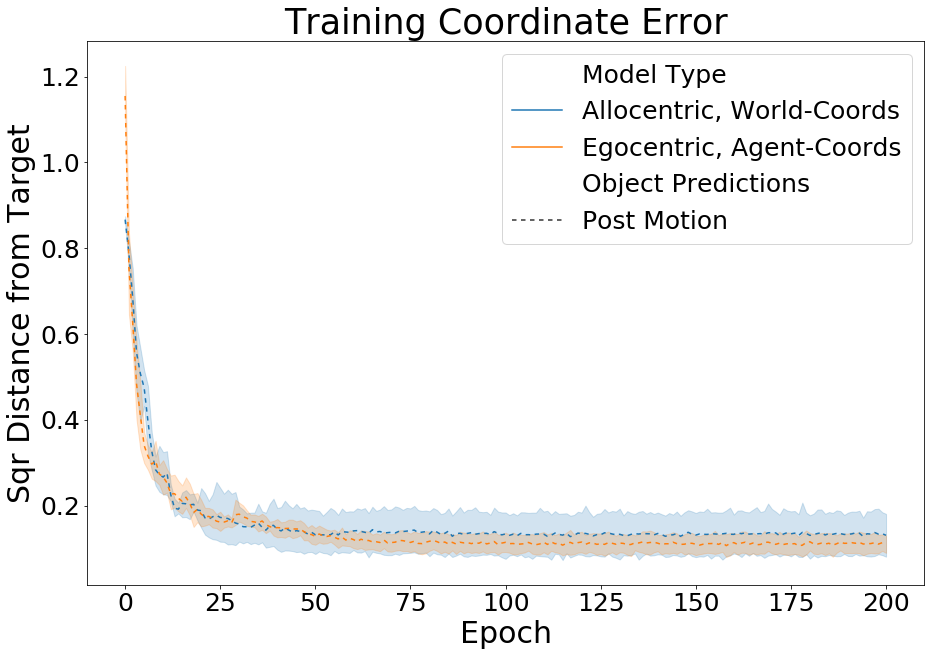

In [70]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y=y,
             hue=hue,
             style=style,
             data=filtered_df,
            dashes=dashes)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Training Coordinate Error",fontsize=35)
plt.ylabel("Sqr Distance from Target",fontsize=30)
plt.xlabel("Epoch", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)

In [51]:
y = "train_obj_acc"
hue = "Model Type"
style = "Object Predictions"

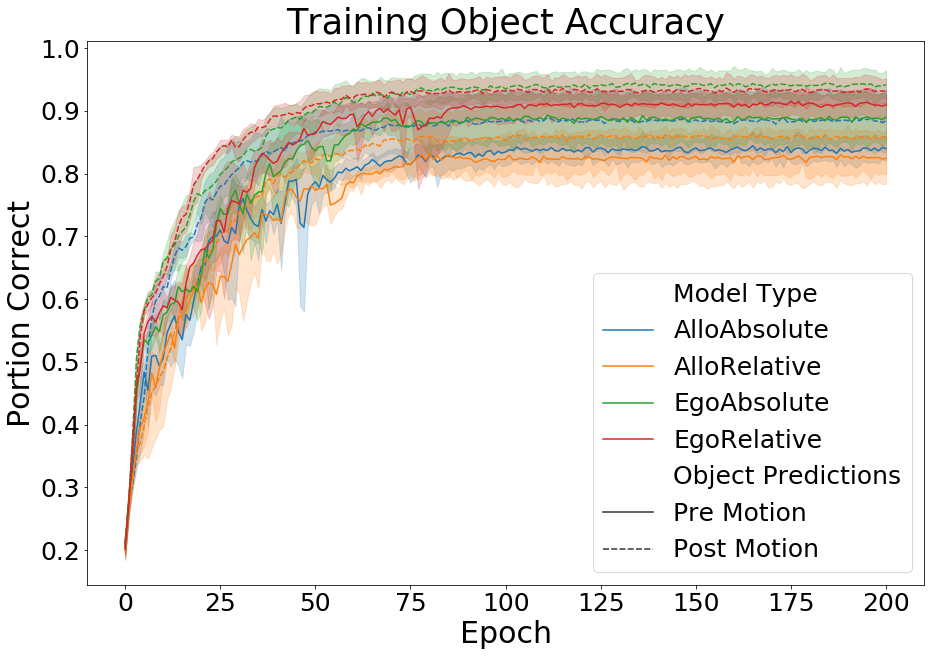

In [52]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y=y,
             hue=hue,
             style=style,
             data=filtered_df)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Training Object Accuracy",fontsize=35)
plt.ylabel("Portion Correct",fontsize=30)
plt.xlabel("Epoch", fontsize=30)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)

In [53]:
# fig = plt.figure(figsize=(15,10))
# sns.lineplot(x="epoch", 
#              y=y,
#              hue=hue,
#              style=style,
#              data=filtered_df)

# plt.ylim([0.01,.04])
# # plt.ylim([0,-.3])
# plt.xlim([-1,75])
# plt.title("Training Loss Comparison",fontsize=25)
# plt.ylabel("Mean Squared Error",fontsize=17)
# plt.xlabel("Epoch", fontsize=17)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# # plt.legend(fontsize=20)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## Seed Deviations

This is a way to compare differences by seed

In [60]:
seed_avgs_df = filtered_df.groupby(["seed", "epoch"])[y].mean().reset_index()
seed_avgs_df['seed_avg'] = seed_avgs_df[y]
del seed_avgs_df[y]

In [61]:
seed_df = filtered_df.merge(seed_avgs_df,how="left",on=["seed","epoch"])
seed_df

,Model Name,absoluteCoords,act_fxn,alpha,attn_size,batch_size,class_bnorm,class_drop_p,class_h_size,cnn_type,dec_drop_p,dec_layers,dec_slen,description,drop_p,egoCentered,emb_size,enc_drop_p,enc_layers,enc_mask,enc_slen,env_name,epoch,exp_name,exp_num,game_keys,gen_decs,ignore_keys,img_shape,init_decs,l2,lr,main_path,maxObjCount,maxObjLoc,minObjCount,minObjLoc,model_class,model_type,multi_gpu,multi_init,n_epochs,n_filts,n_heads,n_loss_loops,n_rollouts,n_runners,n_runs,n_tsteps,obj_recog,post_obj_preds,post_rew_preds,prep_fxn,randomizeObjs,restrictCamera,resume_folder,rew_alpha,rew_recog,save_folder,save_root,seed,smoothMovement,specGoalObjs,state_size,step_loops,targ_shape,train_color_acc,train_color_loss,train_loc_loss,train_loss,train_obj_acc,train_obj_loss,train_rew,train_rew_loss,train_shape_acc,train_shape_loss,use_bptt,val_color_acc,val_color_loss,val_loc_loss,val_loss,val_obj_acc,val_obj_loss,val_rew,val_rew_loss,val_shape_acc,val_shape_loss,validation,worker_id,Model Type,Object Predictions,seed_avg
0,objrecogPVP_5_seed131300_egoCentered0_absolute...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,200,objrecogPVP,5,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,0,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_5_seed13130...,./2d_games,131300,0,0,1,1,torch.Size([4]),0.874097,0.352621,0.209928,0.328094,0.824734,0.509239,tensor(-0.0286),0.0,0.775371,0.665857,True,0.858108,0.353195,0.191120,0.898902,0.452703,1.664020,-0.028286,0.0,0.047297,2.974845,0,NaN,AlloAbsolute,Pre Motion,0.174367
1,objrecogPVP_13_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,177,objrecogPVP,13,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,0,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_13_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.926137,0.200060,0.118904,0.219887,0.871121,0.356542,tensor(-0.0248),0.0,0.816106,0.513023,True,0.940397,0.220671,0.091440,0.816927,0.503311,1.569846,-0.013816,0.0,0.066225,2.919022,0,NaN,AlloAbsolute,Pre Motion,0.155775
2,objrecogPVP_13_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,176,objrecogPVP,13,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,0,False,center_zero2one,0,0,NaN,0.7,False,./2d_games/objrecogPVP/objrecogPVP_13_seed1313...,./2d_games,131310,0,0,1,1,torch.Size([4]),0.923284,0.217053,0.119968,0.232906,0.863738,0.381835,tensor(-0.0274),0.0,0.804193,0.546618,True,0.932432,0.195909,0.085447,0.900662,0.486487,1.741512,-0.012649,0.0,0.040541,3.287115,0,NaN,AlloAbsolute,Pre Motion,0.158288
3,objrecogPVP_13_seed131310_egoCentered0_absolut...,1,ReLU,0.5,64,128,True,0,1000,MediumCNN,0,3,NaN,"Similar to objPreVsPost experiment, but with n...",0,0,512,0,2,False,NaN,~/loc_games/LocationGame2dLinux_5/LocationGame...,175,objrecogPVP,13,"['validation', 'egoCentered', 'absoluteCoords'...",False,"['n_epochs', 'env_name']","torch.Size([3, 128, 128])",False,0.001,0.00025,./2d_games/objrecogPVP,5,0.73,1,0.27,RNNLocator,AlloAbsolute,False,False,200,1,8,1,50,4,16,8,True,0,False,center

In [62]:
seed_df['seed_deviation'] = seed_df[y]-seed_df['seed_avg']

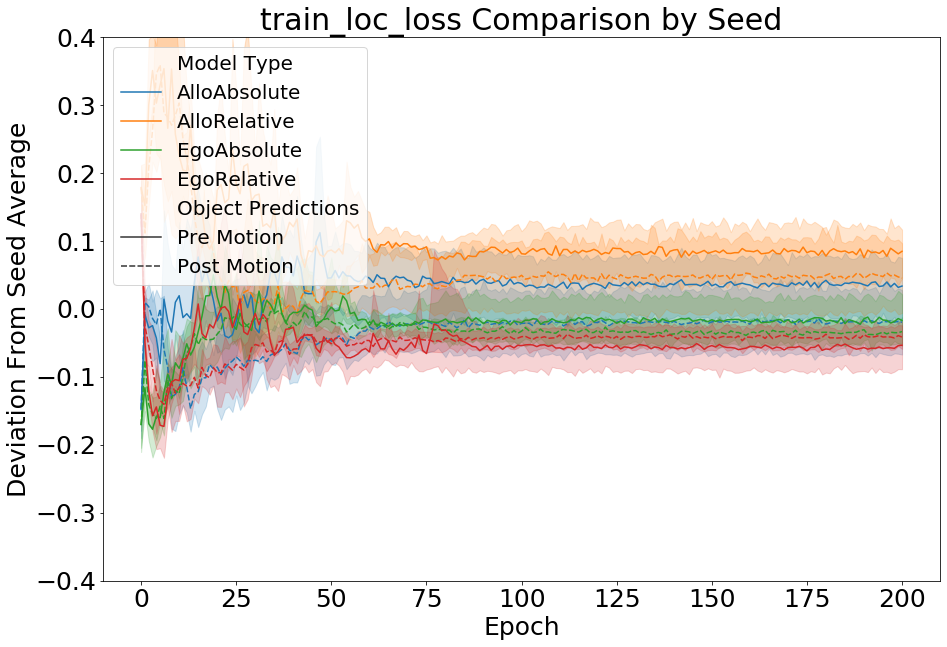

In [63]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y="seed_deviation",
             hue=hue,
             style=style,
             data=seed_df,
             )
plt.ylim([-.4,.4])
# plt.xlim([-1,125])
plt.title(y+" Comparison by Seed",fontsize=30)
plt.ylabel("Deviation From Seed Average",fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(fontsize=20)
plt.show()

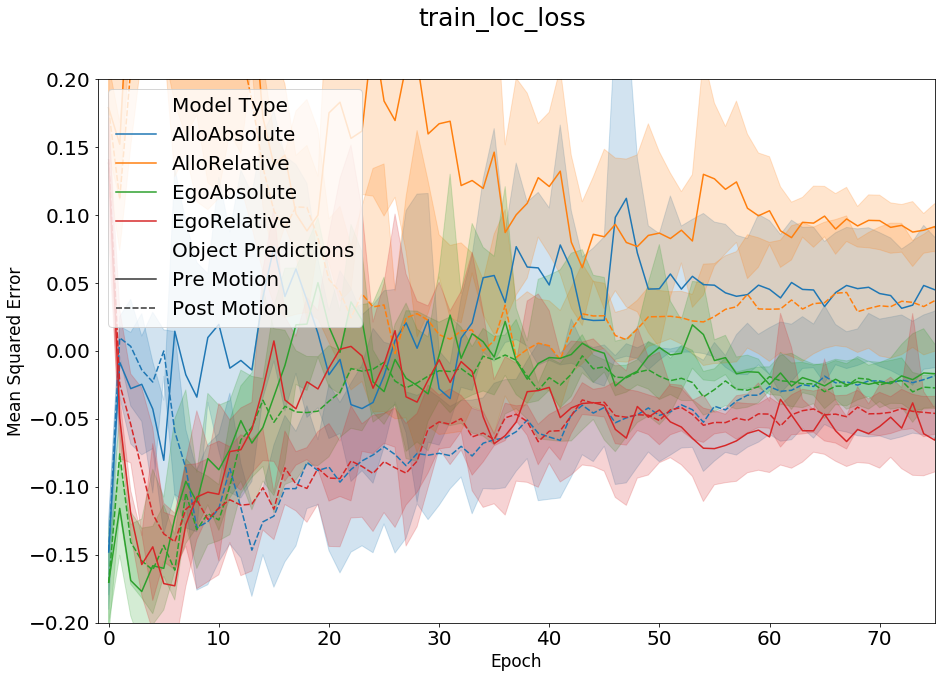

In [64]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y="seed_deviation",
             hue=hue,
             style=style,
             data=seed_df,
             )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([-.2,.2])
plt.xlim([-1,75])
plt.suptitle(y,fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

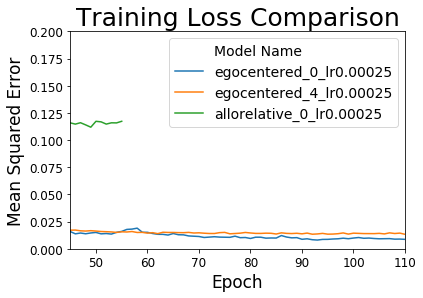

In [24]:
sns.lineplot(x="epoch", y="train_pred_loss",data=df,hue="Model Name")
plt.ylim([0,.2])
plt.xlim([45,110])
plt.title("Training Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

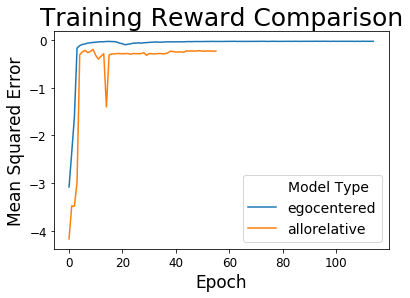

In [12]:
sns.lineplot(x="epoch", y="train_rew",data=comb_df,hue="Model Type")
plt.title("Training Reward Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

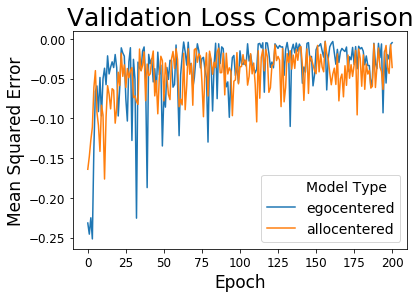

In [44]:
sns.lineplot(x="epoch", y="val_rew",data=comb_df,hue="Model Type")
plt.title("Validation Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

## Debugging

In [25]:
models

['/home/grantsrb/src/locgame/training_scripts/search/search_0_egoCentered0_absoluteCoords0_seed0',
 '/home/grantsrb/src/locgame/training_scripts/search/search_1_egoCentered0_absoluteCoords0_seed1',
 '/home/grantsrb/src/locgame/training_scripts/search/search_2_egoCentered0_absoluteCoords1_seed0',
 '/home/grantsrb/src/locgame/training_scripts/search/search_3_egoCentered0_absoluteCoords1_seed1',
 '/home/grantsrb/src/locgame/training_scripts/search/search_4_egoCentered1_absoluteCoords0_seed0',
 '/home/grantsrb/src/locgame/training_scripts/search/search_5_egoCentered1_absoluteCoords0_seed1']

In [26]:
df1 = pd.read_csv(os.path.join(models[0],"model_data.csv"),sep="!")
df2 = pd.read_csv(os.path.join(models[4],"model_data.csv"),sep="!")

In [27]:
df1

,val_rew,epoch,train_rew_loss,train_rew,train_pred_loss,train_loss
0,-1.824651,0,3.409225,-1.910497,0.781136,1.043945
1,-0.471600,1,2.086273,-1.506832,0.624149,0.770362
2,-0.249342,2,0.510073,-0.455068,0.214749,0.244282
3,-0.453887,3,0.112379,-0.365530,0.178816,0.172173
4,-0.322803,4,0.099665,-0.319833,0.157690,0.151887
5,-0.280210,5,0.121590,-0.351927,0.173200,0.168039
6,-0.386837,6,0.060758,-0.266912,0.133421,0.126154
7,-0.311598,7,0.092057,-0.294112,0.146312,0.140887
8,-0.286130,8,0.130521,-0.288875,0.142251,0.141078
9,-0.220878,9,0.070640,-0.241544,0.120017,0.115079


In [28]:
df2

,val_rew,epoch,train_rew_loss,train_rew,train_pred_loss,train_loss
0,-0.699743,0,2.884135,-1.092956,0.464299,0.706282
1,-0.379654,1,0.282973,-0.408428,0.195035,0.203829
2,-0.278794,2,0.173270,-0.371474,0.180273,0.179572
3,-0.389712,3,0.101787,-0.315467,0.156022,0.150598
4,-0.317442,4,0.122804,-0.372359,0.183195,0.177156
5,-0.386597,5,0.046109,-0.264131,0.132032,0.123439
6,-0.159716,6,0.087388,-0.279273,0.138750,0.133614
7,-0.149181,7,0.048100,-0.241904,0.120895,0.113615
8,-0.447230,8,0.085830,-0.234257,0.116413,0.113355
9,-0.133449,9,0.072444,-0.223601,0.111077,0.107213
